<a href="https://colab.research.google.com/github/santos-luciano/reddit_collect/blob/main/Web_Scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando a biblioteca praw

In [ ]:
!pip install praw

# Lendo as bibliotecas necessárias

In [32]:
import praw
import pandas as pd
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Carregando comentários de um post

In [ ]:
reddit = praw.Reddit(
    client_id="5gzN-N3yiwaawbtRDTniCw",
    client_secret="gQzhykzk0MQ4yiWaYJrrpGRf-fUgpw",
    user_agent="meu_script:v1.0 (by u/LegFantastic551)"
)

# Post no Reddit 1b50d6q
# https://www.reddit.com/r/Salvador/comments/1b50d6q/oque_acham_do_projeto_da_ponte_salavdoritaparica/

submission = reddit.submission(id="1b50d6q")
submission.comments.replace_more(limit=0)

data = []
for comment in submission.comments.list():
    data.append({
        "post_title": submission.title,
        "comment_body": comment.body,
        "comment_score": comment.score,
        "comment_author": str(comment.author)
    })

df = pd.DataFrame(data)
df = df.iloc[1:]

In [27]:
df.head(10)

,post_title,comment_body,comment_score,comment_author
1,Oque acham do projeto da ponte Salavdor-Itapar...,O serviço péssimo do ferry parece até lobby pr...,22,croninhos2
2,Oque acham do projeto da ponte Salavdor-Itapar...,Espero seja concluída. Porque vai ficar bonito...,14,VisibleListen9513
3,Oque acham do projeto da ponte Salavdor-Itapar...,Eu soube que vai inaugurar em 2014,30,Cabo_Martim
4,Oque acham do projeto da ponte Salavdor-Itapar...,Dizem que isso ia acabar com a ilha. Ia virar ...,12,None
5,Oque acham do projeto da ponte Salavdor-Itapar...,Morei lá um tempo atrás. Penso que a ponte tra...,9,Independent-Seat5819
6,Oque acham do projeto da ponte Salavdor-Itapar...,Se com o metro já deu para desviar imagina com...,10,Visual_Improvement37
7,Oque acham do projeto da ponte Salavdor-Itapar...,Eu era criança tavam dizendo que essa pronta l...,9,Jun06ko
8,Oque acham do projeto da ponte Salavdor-Itapar...,"Acho massa, mas queria que os chineses metesse...",8,frlaurent
9,Oque acham do projeto da ponte Salavdor-Itapar...,Uma coisa que pouco se discute é o impacto amb...,5,Strange_Sky3362
10,Oque acham do projeto da ponte Salavdor-Itapar...,Metrô 2,5,eutenhoup


In [28]:
# Carrega modelo BERT

classifier = pipeline("sentiment-analysis",
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

resultados = [classifier(c)[0] for c in df.comment_body]

Device set to use cpu


In [29]:
# Mostrar resultados
for c, r in zip(df.comment_body, resultados):
    print(f"{c} -> {r['label']}")


O serviço péssimo do ferry parece até lobby pra ponte. Todo mundo quer -> 1 star
Espero seja concluída. Porque vai ficar bonito vê ela sobre essas águas. -> 4 stars
Eu soube que vai inaugurar em 2014 -> 3 stars
Dizem que isso ia acabar com a ilha. Ia virar mais um bairro de Salvador. Tendo a acreditar. Mas ajudaria muita gente também. -> 3 stars
Morei lá um tempo atrás. Penso que a ponte transformaria Itaparica em uma Niterói. -> 3 stars
Se com o metro já deu para desviar imagina com a ponte. -> 3 stars
Eu era criança tavam dizendo que essa pronta logo logo ficava pronta 
Já sou adulto -> 1 star
Acho massa, mas queria que os chineses metessem uns trem de alta velocidade aqui logo, ao invés dos carros elétricos

Deixa os EUA se lascar pra lá com modal rodoviário -> 2 stars
Uma coisa que pouco se discute é o impacto ambiental que vai gerar durante a construção da ponte, acho que o transporte aquático de qualidade seria mais viável -> 3 stars
Metrô 2 -> 5 stars
eu ja morei na ilha e eu po

In [ ]:
# Baixar stopwords em português
nltk.download('stopwords')

texto = df.comment_body.str.cat(sep=' ')

# Lista de stopwords em português
stop_words = set(stopwords.words('portuguese'))

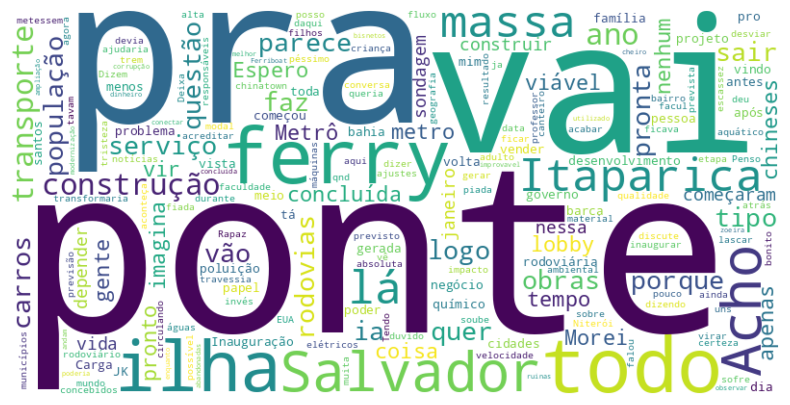

In [35]:
# Gerar nuvem de palavras
nuvem = WordCloud(width=800, height=400,
                  background_color='white',
                  stopwords=stop_words,
                  collocations=False).generate(texto)

# Mostrar resultado
plt.figure(figsize=(10,5))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis("off")
plt.show()